In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
features_df = pd.read_csv('training_set_features.csv',index_col='respondent_id') 
labels_df = pd.read_csv('training_set_labels.csv',index_col='respondent_id')
pd.set_option("display.max_columns", 100)

In [3]:
print("features_df.shape", features_df.shape)
features_df.head(2)

features_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe


In [4]:
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [5]:
print("labels_df.shape", labels_df.shape)
labels_df.head(5)

labels_df.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [6]:
#indices are matching
np.testing.assert_array_equal(features_df.index.values,labels_df.index.values)

#### Comparing and analysis the two target variables 

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64
0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64


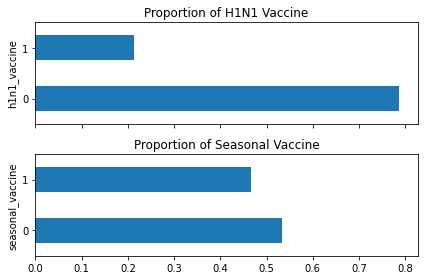

In [7]:
fig,ax = plt.subplots(2,1,sharex=True)
n_obs = labels_df.shape[0] 

print(labels_df['h1n1_vaccine'].value_counts().div(n_obs))
labels_df['h1n1_vaccine'].value_counts().div(n_obs).plot.\
barh(title="Proportion of H1N1 Vaccine",ax=ax[0])
ax[0].set_ylabel('h1n1_vaccine')

print(labels_df['seasonal_vaccine'].value_counts().div(n_obs))
labels_df['seasonal_vaccine'].value_counts().div(n_obs).plot.\
barh(title="Proportion of Seasonal Vaccine",ax=ax[1])
ax[1].set_ylabel('seasonal_vaccine')

fig.tight_layout()

In [8]:
pd.crosstab(labels_df['h1n1_vaccine'],labels_df['seasonal_vaccine'],
           margins=True,normalize=True)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


#### Correlation

In [9]:
labels_df['h1n1_vaccine'].corr(labels_df['seasonal_vaccine'],
                               method='pearson')

0.37714265306144684

#### Joining Features and Target Variables

In [10]:
joined_df = features_df.join(labels_df)
print(joined_df.shape)
joined_df.head(3)

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0


#### How features are correlated with the target variables

In [11]:
counts = joined_df[['h1n1_concern','h1n1_vaccine']]\
.groupby(['h1n1_concern','h1n1_vaccine']).size()\
.unstack('h1n1_vaccine')
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


#### Graphical analysis of X and y

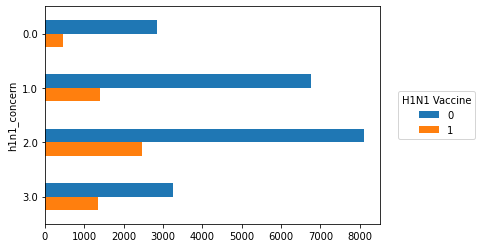

In [12]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(loc='center right',
         bbox_to_anchor=(1.3,0.5),
         title='H1N1 Vaccine')
ax.grid(False)

In [13]:
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [14]:
props = counts.div(h1n1_concern_counts,axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


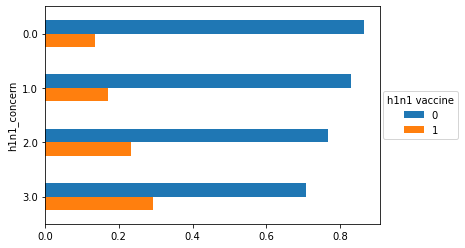

In [15]:
ax=props.plot.barh()
ax.invert_yaxis() 
ax.legend(loc='center right',
         bbox_to_anchor=(1.25,0.5),
         title='h1n1 vaccine')

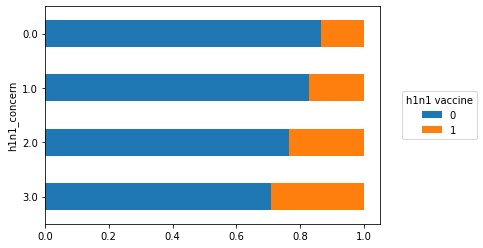

In [16]:
ax=props.plot.barh(stacked=True)
ax.invert_yaxis() 
ax.legend(loc='center left',
         bbox_to_anchor=(1.05,0.5),
         title='h1n1 vaccine')

In [17]:
def vaccination_rate_plot(col,target,data,ax=None):
    # col is X, target is Y
    counts= joined_df[[target,col]].groupby([target,col]).size()\
    .unstack(target)
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts,axis='index')
    
    props.plot(kind='barh',stacked=True,ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

In [18]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

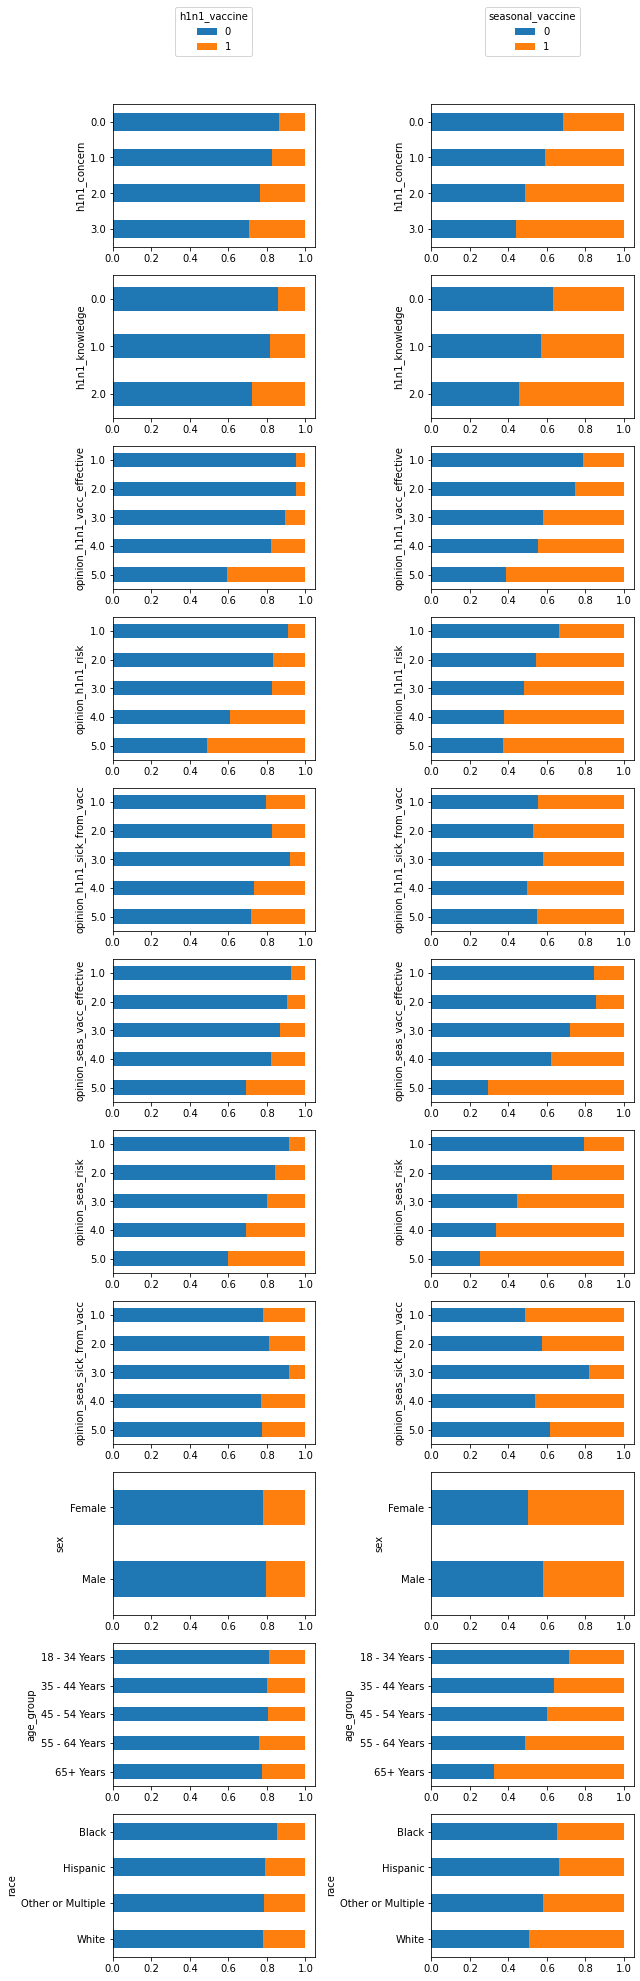

In [19]:
fig,ax = plt.subplots(len(cols_to_plot),2,figsize=(9,len(cols_to_plot)*2.5))

for idx,col in enumerate(cols_to_plot):
    vaccination_rate_plot(col,'h1n1_vaccine',joined_df,ax=ax[idx,0]) 
    # ax[idx,0] - row,column
    vaccination_rate_plot(col,'seasonal_vaccine',joined_df,ax=ax[idx,1])
    
ax[0,0].legend(loc='lower center',bbox_to_anchor=(0.5,1.3),title='h1n1_vaccine')
ax[0,1].legend(loc='lower center',bbox_to_anchor=(0.5,1.3),title='seasonal_vaccine')   

fig.tight_layout()

Building the model

In [54]:
import optuna
from sklearn.model_selection import cross_val_score,StratifiedKFold,cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
numeric_features = features_df.select_dtypes(include = ['float64']).columns.to_list()

In [44]:
ordinal_features = ['education']
ordinal_categories = [['< 12 Years', '12 Years', 'Some College', 'College Graduate']]

In [45]:
categorical_features = features_df.select_dtypes(include = ['object']).columns.to_list()
nominal_features = [item for item in categorical_features if item not in ordinal_features]

#### Features Preprocessing

In [46]:
#Pipelines
numeric_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',MinMaxScaler())
])

ordinal_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinal',OrdinalEncoder(categories=ordinal_categories))
])

nominal_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('nominal',OneHotEncoder(handle_unknown='ignore'))
])

#Preprocessor
preprocessor = ColumnTransformer([
    ('num',numeric_pipeline,numeric_features),
    ('ord',ordinal_pipeline,ordinal_features),
    ('nom',nominal_pipeline,nominal_features)
])

#### Compare Classifiers without MultiOutputClassifier

In [47]:
xgb_pipeline = Pipeline([
    ('preprocessing',preprocessor),
    ('classifier',XGBClassifier(use_label_encoder=False,eval_metric='logloss'))
])

gb_pipeline = Pipeline([
    ('preprocessing',preprocessor),
    ('classifier',GradientBoostingClassifier())
])

#### Evaluating using Cross Validation

In [48]:
X = features_df
y = labels_df

In [49]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [50]:
#XGBClassifier
xgb_h1n1 = cross_val_score(xgb_pipeline,X,y['h1n1_vaccine'],cv=cv,scoring='roc_auc').mean()
xgb_seasonal = cross_val_score(xgb_pipeline,X,y['seasonal_vaccine'],cv=cv,scoring='roc_auc').mean()

print("XGBClassifier")
print(f"H1N1 ROC AUC: {xgb_h1n1:.4f}")
print(f"Seasonal ROC AUC: {xgb_seasonal:.4f}")

XGBClassifier
H1N1 ROC AUC: 0.8572
Seasonal ROC AUC: 0.8554


In [51]:
#GradientBoostClassifier
gb_h1n1 = cross_val_score(gb_pipeline,X,y['h1n1_vaccine'],cv=cv,scoring='roc_auc').mean()
gb_seasonal = cross_val_score(gb_pipeline,X,y['seasonal_vaccine'],cv=cv,scoring='roc_auc').mean()

print("GradientBoostClassifier")
print(f"H1N1 ROC AUC: {gb_h1n1:.4f}")
print(f"Seasonal ROC AUC: {gb_seasonal:.4f}")

GradientBoostClassifier
H1N1 ROC AUC: 0.8668
Seasonal ROC AUC: 0.8620


#### Using MultiOutputClassifier

In [53]:
final_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', MultiOutputClassifier(GradientBoostingClassifier(random_state=42)))
])

#### Using optuna

In [60]:
def objective(trial):
    params ={
        'n_estimators':trial.suggest_int('n_estimators',50,300),
        'max_depth':trial.suggest_int('max_depth',2,10),
        'learning_rate':trial.suggest_float('learning_rate',0.01,0.5),
        'subsample':trial.suggest_float('subsample',0.6,1.0),
        'min_samples_split':trial.suggest_int('min_samples_split',2,10),
        'max_features':trial.suggest_categorical('max_features',['sqrt','log2'])        
    }
    
    final_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', MultiOutputClassifier(GradientBoostingClassifier(**params, random_state=42)))
    ])
    
    y_pred_proba = cross_val_predict(final_model,X,y,cv=5,method='predict_proba')
    
    h1n1_proba = y_pred_proba[0][:,1]
    seasonal_proba = y_pred_proba[1][:,1]
    
    h1n1_score = roc_auc_score(y['h1n1_vaccine'],h1n1_proba)
    seasonal_score = roc_auc_score(y['seasonal_vaccine'],seasonal_proba)
    
    return (h1n1_score+seasonal_score)/2   

In [61]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=30)

print("Best params:", study.best_params)

[I 2025-06-19 17:16:01,933] A new study created in memory with name: no-name-3447b990-34f6-43b0-906e-ff6a46ef6ea5
[I 2025-06-19 17:19:03,956] Trial 0 finished with value: 0.8659600446287496 and parameters: {'n_estimators': 298, 'max_depth': 9, 'learning_rate': 0.012870239090075192, 'subsample': 0.7463659224375457, 'min_samples_split': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8659600446287496.
[I 2025-06-19 17:19:31,586] Trial 1 finished with value: 0.8538136522681752 and parameters: {'n_estimators': 135, 'max_depth': 2, 'learning_rate': 0.09384185658361074, 'subsample': 0.8614134007239999, 'min_samples_split': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.8659600446287496.
[I 2025-06-19 17:20:48,580] Trial 2 finished with value: 0.8518845136875537 and parameters: {'n_estimators': 242, 'max_depth': 5, 'learning_rate': 0.22401267261397945, 'subsample': 0.6423423924531622, 'min_samples_split': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.86596004

[I 2025-06-19 17:59:31,201] Trial 28 finished with value: 0.8637222238510629 and parameters: {'n_estimators': 190, 'max_depth': 10, 'learning_rate': 0.03927169188411808, 'subsample': 0.6696047784007284, 'min_samples_split': 6, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.8662190935251822.
[I 2025-06-19 18:01:06,489] Trial 29 finished with value: 0.8594940542715067 and parameters: {'n_estimators': 247, 'max_depth': 7, 'learning_rate': 0.11191194792056197, 'subsample': 0.7845787921335777, 'min_samples_split': 8, 'max_features': 'log2'}. Best is trial 24 with value: 0.8662190935251822.


Best params: {'n_estimators': 192, 'max_depth': 7, 'learning_rate': 0.04914797648422338, 'subsample': 0.71391810633869, 'min_samples_split': 9, 'max_features': 'sqrt'}


In [62]:
print(study.best_params)

{'n_estimators': 192, 'max_depth': 7, 'learning_rate': 0.04914797648422338, 'subsample': 0.71391810633869, 'min_samples_split': 9, 'max_features': 'sqrt'}


#### Final Model

In [63]:
best_params = study.best_params

final_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', MultiOutputClassifier(GradientBoostingClassifier(
        **best_params,
        validation_fraction=0.1,
        n_iter_no_change=20  # optional early stopping
    )))
])

final_model.fit(X,y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavio

#### ROC AUC PLOT

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

Computed AUC
auc_h1n1:  0.8749279834636838
auc_seasonal:  0.8625632890713548
average auc:  0.8687456362675193


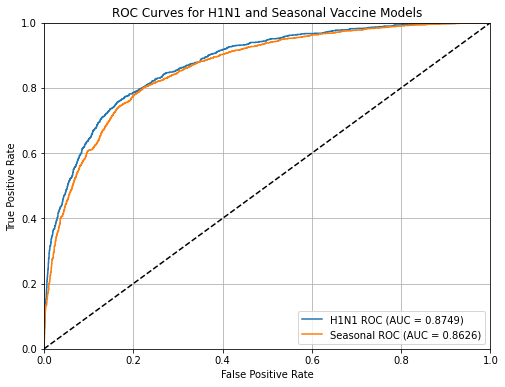

In [69]:
# Split just for evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Retrain the final model on training split
final_model.fit(X_train, y_train)

# Predict probabilities on validation set
val_preds = final_model.predict_proba(X_val)

# Extract probabilities for class 1
h1n1_probs = val_preds[0][:, 1]
seasonal_probs = val_preds[1][:, 1]

# Compute ROC curves
fpr_h1n1, tpr_h1n1, threshold_h1n1 = roc_curve(y_val['h1n1_vaccine'], h1n1_probs)
fpr_seasonal, tpr_seasonal, threshold_seasonal = roc_curve(y_val['seasonal_vaccine'], seasonal_probs)

# Compute AUC
auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)
auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

print('Computed AUC')
print('auc_h1n1: ',auc_h1n1)
print('auc_seasonal: ',auc_seasonal )
print('average auc: ',(auc_h1n1+auc_seasonal)/2)

# Plot both curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_h1n1, tpr_h1n1, label=f"H1N1 ROC (AUC = {auc_h1n1:.4f})")
plt.plot(fpr_seasonal, tpr_seasonal, label=f"Seasonal ROC (AUC = {auc_seasonal:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for H1N1 and Seasonal Vaccine Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### PREDICT ON TEST SET & SAVE SUBMISSION

In [72]:
test_X = pd.read_csv('test_set_features.csv',index_col='respondent_id')

In [76]:
test_X[:2]

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp


In [73]:
test_preds = final_model.predict_proba(test_X)

h1n1_preds = test_preds[0][:, 1]
seasonal_preds = test_preds[1][:, 1]

In [74]:
submission_df = pd.read_csv("./submission_format.csv", 
                            index_col="respondent_id")

In [77]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_X.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = h1n1_preds
submission_df["seasonal_vaccine"] = seasonal_preds

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.111694,0.281963
26708,0.025578,0.035299
26709,0.254745,0.745437
26710,0.709785,0.880832
26711,0.265577,0.405771


In [78]:
submission_df.to_csv('submission_format.csv', index=True)

In [82]:
df = pd.read_csv('submission_format.csv')
print(df.head(5))
print(df.tail(5))

   respondent_id  h1n1_vaccine  seasonal_vaccine
0          26707      0.111694          0.281963
1          26708      0.025578          0.035299
2          26709      0.254745          0.745437
3          26710      0.709785          0.880832
4          26711      0.265577          0.405771
       respondent_id  h1n1_vaccine  seasonal_vaccine
26703          53410      0.164202          0.469479
26704          53411      0.183653          0.383022
26705          53412      0.172015          0.186268
26706          53413      0.033604          0.268050
26707          53414      0.616164          0.768034
